In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initnial EDA

### Read the data

In [3]:
df = pd.read_csv('data.csv', usecols=[*range(0,12)], names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,39,A0,77516,B0,13,C0,D0,E0,2174,0,40,0
1,50,A1,83311,B0,13,C1,D0,E0,0,0,13,0
2,38,A2,215646,B1,9,C2,D0,E0,0,0,40,0
3,53,A2,234721,B2,7,C2,D1,E0,0,0,40,0
4,28,A2,338409,B0,13,C3,D1,E1,0,0,40,0


In [5]:
df.shape

(10000, 12)

**The data does not seems to have a header/column row, it is reread with an added column name**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  int64 
 1   1       10000 non-null  object
 2   2       10000 non-null  int64 
 3   3       10000 non-null  object
 4   4       10000 non-null  int64 
 5   5       10000 non-null  object
 6   6       10000 non-null  object
 7   7       10000 non-null  object
 8   8       10000 non-null  int64 
 9   9       10000 non-null  int64 
 10  10      10000 non-null  int64 
 11  11      10000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 937.6+ KB


**There are no null value**

In [7]:
df.describe()

,0,2,4,8,9,10,11
count,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.338300,1.906607e+05,10.12510,1077.261800,89.555300,41.067400,0.246100
std,13.086099,1.053789e+05,2.54411,7344.244588,403.778098,11.935112,0.430759
min,17.000000,1.930200e+04,1.00000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.185045e+05,9.00000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.794230e+05,10.00000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.395390e+05,13.00000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.226583e+06,16.00000,99999.000000,3004.000000,99.000000,1.000000


#### Check unique values in each column
##### All cols

In [8]:
columns = [*range(0,12)]
categorical_columns = [1, 3, 5, 6, 7]
for index, i in enumerate(columns):
    if index in categorical_columns: 
        data_type = 'categorical'
    else : 
        data_type = 'numeric'
    print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 1 	 has 7 unique values, categorical
column 2 	 has 8457 unique values, numeric
column 3 	 has 16 unique values, categorical
column 4 	 has 16 unique values, numeric
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### numeric only

In [9]:
for index, i in enumerate(columns):
    data_type = 'numeric'
    if index not in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 2 	 has 8457 unique values, numeric
column 4 	 has 16 unique values, numeric
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### categorical

In [10]:
col_to_add = 0
for index, i in enumerate(columns):
    data_type = 'categorical'
    if index in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))
        col_to_add+=len(df[i].unique())
print('col to be added with dummbies', col_to_add)

column 1 	 has 7 unique values, categorical
column 3 	 has 16 unique values, categorical
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
col to be added with dummbies 44


#### col 11 unique values

In [11]:
df[11].unique()

array([0, 1])

#### Graphs

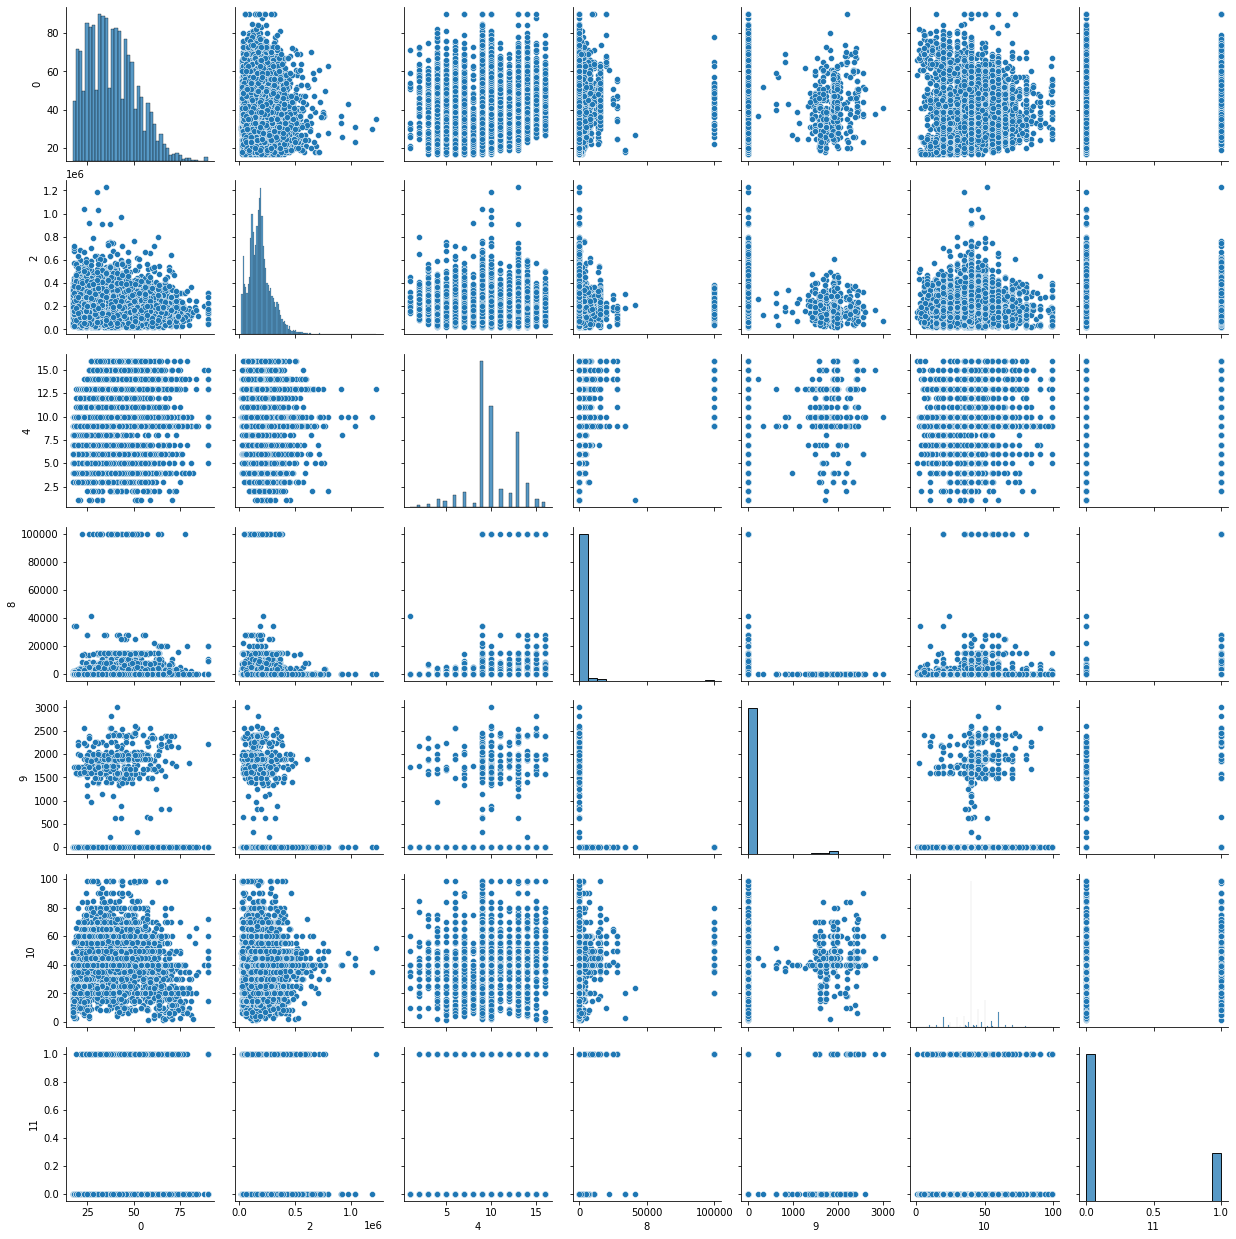

In [12]:
sns.pairplot(df)

<AxesSubplot:>

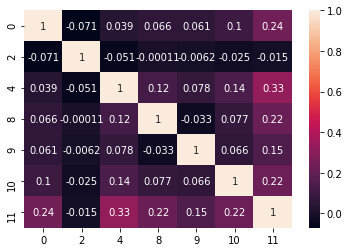

In [13]:
sns.heatmap(df[[0, 2, 4, 8, 9, 10, 11]].corr(), annot = True)

**There are very little correlation between the numeric data and the target column**

#### Check the distribution of the categorical data

1


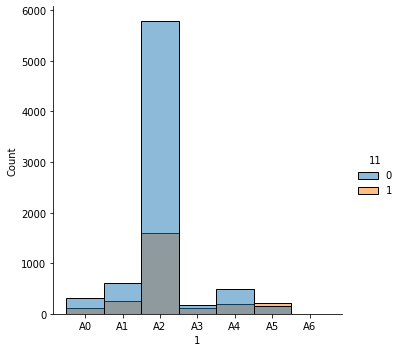

In [68]:
print(1)
sns.displot(df, x=df[1], hue=df[11])

3


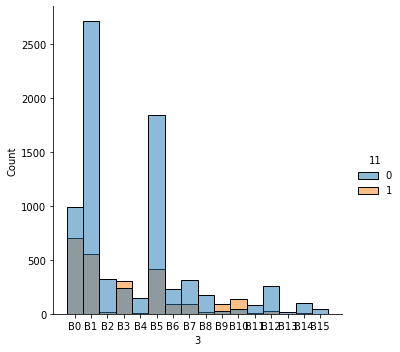

In [69]:
print(3)
sns.displot(df, x=df[3], hue=df[11])

5


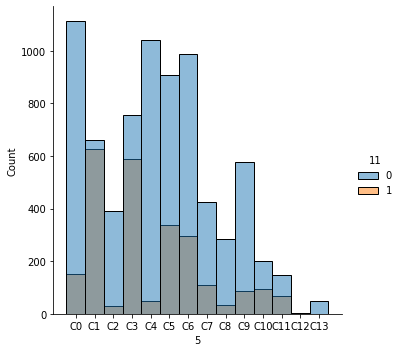

In [70]:
print(5)
sns.displot(df, x=df[5], hue=df[11])

6


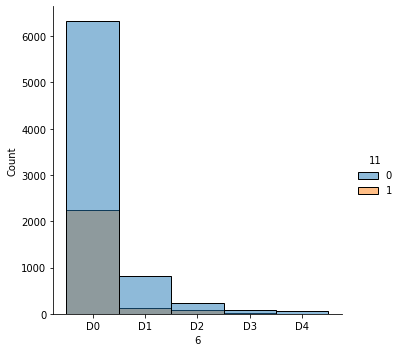

In [72]:
print(6)
sns.displot(df, x=df[6], hue=df[11])

7


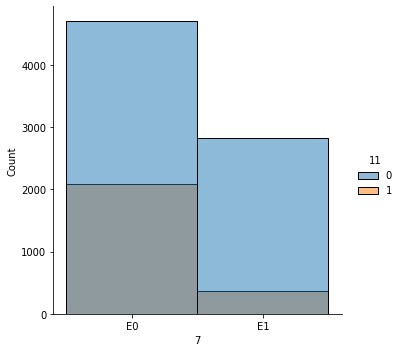

In [73]:
print(7)
sns.displot(df, x=df[7], hue=df[11])

#### Target data distribution

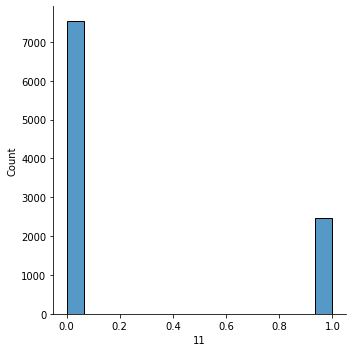

In [21]:
sns.displot(df[11])

### Feature Engineering on the categorical columns
#### Each Unique values get a col

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(df[[1]]).toarray()
feature_label = [str(1) + "_" + str(i) for i in range(feature_arr.shape[1])]
feature = pd.DataFrame(feature_arr, columns=feature_label)

In [24]:
# if data is categorical, transform them
df_ohe = df.copy()
for index, i in enumerate(columns):
    if index in categorical_columns: 
        ohe = OneHotEncoder()
        feature_arr = ohe.fit_transform(df[[index]]).toarray()
        feature_label = [str(index) + "_" + str(k) for k in range(feature_arr.shape[1])]
        feature = pd.DataFrame(feature_arr, columns=feature_label)
        # drop the last col
        # feature = feature.iloc[:, :-1]
        df_ohe = pd.concat([df_ohe, feature], axis=1)
        df_ohe.drop(index, axis=1, inplace=True)

In [25]:
df_ohe.head()

,0,2,4,8,9,10,11,1_0,1_1,1_2,...,5_11,5_12,5_13,6_0,6_1,6_2,6_3,6_4,7_0,7_1
0,39,77516,13,2174,0,40,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [92]:
df_ohe.columns

Index([     0,      2,      4,      8,      9,     10,     11,  '1_0',  '1_1',
        '1_2',  '1_3',  '1_4',  '1_5',  '1_6',  '3_0',  '3_1',  '3_2',  '3_3',
        '3_4',  '3_5',  '3_6',  '3_7',  '3_8',  '3_9', '3_10', '3_11', '3_12',
       '3_13', '3_14', '3_15',  '5_0',  '5_1',  '5_2',  '5_3',  '5_4',  '5_5',
        '5_6',  '5_7',  '5_8',  '5_9', '5_10', '5_11', '5_12', '5_13',  '6_0',
        '6_1',  '6_2',  '6_3',  '6_4',  '7_0',  '7_1'],
      dtype='object')

## Train

### Base Model

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [283]:
scaler = MinMaxScaler()

In [284]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [285]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [286]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [287]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='adam')

In [288]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.5715 - val_loss: 0.5236
Epoch 2/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5364 - val_loss: 0.4928
Epoch 3/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5069 - val_loss: 0.4666
Epoch 4/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4458
Epoch 5/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4744 - val_loss: 0.4415
Epoch 6/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4674 - val_loss: 0.4343
Epoch 7/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4679 - val_loss: 0.4395
Epoch 8/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4601 - val_loss: 0.4328
Epoch 9/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4568 - val_loss: 0.4273
Epoch 10/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.449

219/219 [==============================] - 0s 1ms/step - loss: 0.4077 - val_loss: 0.3859
Epoch 160/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4103 - val_loss: 0.3824
Epoch 161/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4009 - val_loss: 0.3850
Epoch 162/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4040 - val_loss: 0.3856
Epoch 163/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4023 - val_loss: 0.3818
Epoch 164/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4024 - val_loss: 0.3824
Epoch 165/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4065 - val_loss: 0.3817
Epoch 166/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4075 - val_loss: 0.3848
Epoch 167/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4067 - val_loss: 0.3812
Epoch 168/2000
219/219 [==============================] - 0s 1ms/step - loss: 0

Epoch 238/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3975 - val_loss: 0.3824
Epoch 239/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3995 - val_loss: 0.3757
Epoch 240/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4014 - val_loss: 0.3826
Epoch 241/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3997 - val_loss: 0.3875
Epoch 242/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3972 - val_loss: 0.3773
Epoch 243/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3932 - val_loss: 0.3756
Epoch 244/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3975 - val_loss: 0.3815
Epoch 245/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3974 - val_loss: 0.3760
Epoch 246/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4017 - val_loss: 0.3848
Epoch 247/2000
219/219 [==============================] - 0s 1ms

Epoch 317/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3930 - val_loss: 0.3776
Epoch 318/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3925 - val_loss: 0.3802
Epoch 319/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3948 - val_loss: 0.3849
Epoch 320/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3939 - val_loss: 0.3812
Epoch 321/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3966 - val_loss: 0.3785
Epoch 322/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3971 - val_loss: 0.3764
Epoch 323/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3894 - val_loss: 0.3764
Epoch 324/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3985 - val_loss: 0.3844
Epoch 325/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3935 - val_loss: 0.3732
Epoch 326/2000
219/219 [==============================] - 0s 1ms

Epoch 396/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3971 - val_loss: 0.3761
Epoch 397/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3880 - val_loss: 0.3762
Epoch 398/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3915 - val_loss: 0.3802
Epoch 399/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.3760
Epoch 400/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3931 - val_loss: 0.3767
Epoch 401/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3869 - val_loss: 0.3765
Epoch 402/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3925 - val_loss: 0.3751
Epoch 403/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3934 - val_loss: 0.3764
Epoch 404/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3931 - val_loss: 0.3751
Epoch 405/2000
219/219 [==============================] - 0s 1ms

<AxesSubplot:>

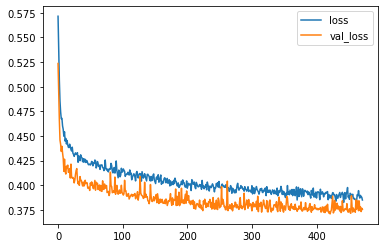

In [289]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [290]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [291]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2187   81]
 [ 439  293]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2268
           1       0.78      0.40      0.53       732

    accuracy                           0.83      3000
   macro avg       0.81      0.68      0.71      3000
weighted avg       0.82      0.83      0.80      3000

accuracy_score 0.8266666666666667


#### PCA
##### Standarize the data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
# scale without col 11, the target col
scaler.fit(df_ohe.drop([11], axis=1))

StandardScaler()

In [29]:
scaled_data = scaler.transform(df_ohe.drop([11], axis=1))

#### PCA

In [30]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)

In [57]:
pca.fit(scaled_data)

PCA(n_components=2)

In [58]:
x_pca = pca.transform(scaled_data)

In [59]:
x_pca.shape

(10000, 2)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

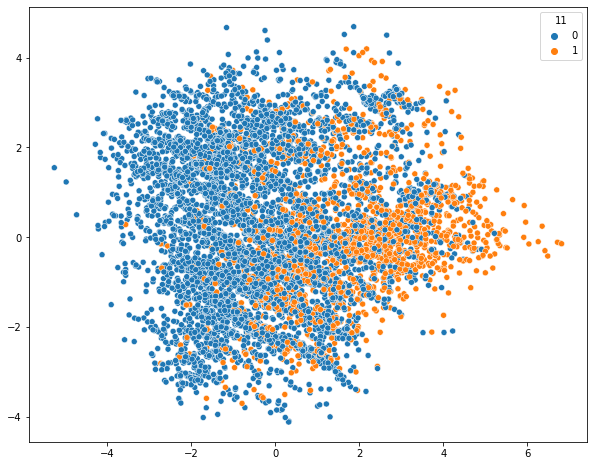

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df[11])

### Split the data

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
X = x_pca
y = df_ohe[11].values

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [343]:
from sklearn.preprocessing import MinMaxScaler

In [344]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [345]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [346]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='adam')

In [347]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.6197 - val_loss: 0.4616
Epoch 2/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5124 - val_loss: 0.4312
Epoch 3/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4689 - val_loss: 0.4157
Epoch 4/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4572 - val_loss: 0.4091
Epoch 5/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4492 - val_loss: 0.4027
Epoch 6/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4407 - val_loss: 0.3988
Epoch 7/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4295 - val_loss: 0.3941
Epoch 8/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4263 - val_loss: 0.3946
Epoch 9/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4260 - val_loss: 0.3916
Epoch 10/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.416

<AxesSubplot:>

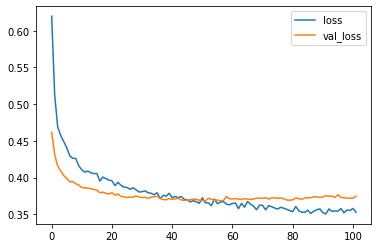

In [348]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Predictions

In [349]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [350]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2148  120]
 [ 415  317]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2268
           1       0.73      0.43      0.54       732

    accuracy                           0.82      3000
   macro avg       0.78      0.69      0.72      3000
weighted avg       0.81      0.82      0.80      3000

accuracy_score 0.8216666666666667


### Different model

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [314]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [367]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [368]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.7266 - val_loss: 0.5761
Epoch 2/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.6024 - val_loss: 0.5702
Epoch 3/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5826 - val_loss: 0.5684
Epoch 4/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5769 - val_loss: 0.5644
Epoch 5/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5663 - val_loss: 0.5620
Epoch 6/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5625 - val_loss: 0.5605
Epoch 7/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5576 - val_loss: 0.5578
Epoch 8/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5520 - val_loss: 0.5548
Epoch 9/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5495 - val_loss: 0.5524
Epoch 10/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.546

219/219 [==============================] - 0s 1ms/step - loss: 0.4305 - val_loss: 0.4647
Epoch 160/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4289 - val_loss: 0.4655
Epoch 161/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4238 - val_loss: 0.4678
Epoch 162/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4329 - val_loss: 0.4703
Epoch 163/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4275 - val_loss: 0.4684
Epoch 164/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4225 - val_loss: 0.4689
Epoch 165/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4312 - val_loss: 0.4753
Epoch 166/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4298 - val_loss: 0.4720
Epoch 167/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4230 - val_loss: 0.4773
Epoch 168/1000
219/219 [==============================] - 0s 1ms/step - loss: 0

<AxesSubplot:>

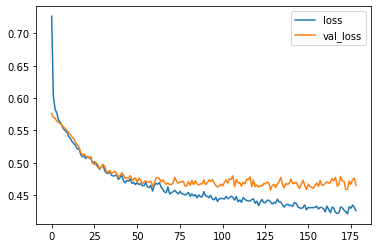

In [369]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [370]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[1929  339]
 [ 225  507]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2268
           1       0.60      0.69      0.64       732

    accuracy                           0.81      3000
   macro avg       0.75      0.77      0.76      3000
weighted avg       0.82      0.81      0.82      3000

accuracy_score 0.812
